In [35]:
# Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np

from scipy.stats import chi2_contingency

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plot we will create

# Read in the data

df = pd.read_csv(r'C:\Users\ahmed\Downloads\archive (1)\movies.csv')


In [42]:
# Looking at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0


In [36]:
# Removing null values

df = df.dropna()

# Checking missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [37]:
# Data types

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
# df type change float64 -> int64 

df['budget'] = df['budget'].astype('int64')

In [41]:
# Extracting the year from the date str

df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

# Drop column

df.drop(columns=['yearcorrect'], inplace=True)

In [31]:
# Sort by gross

df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [26]:
# Look at all the rows

pd.set_option('display.max_rows', None)

In [54]:
# Drop duplicates

df.drop_duplicates().head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0


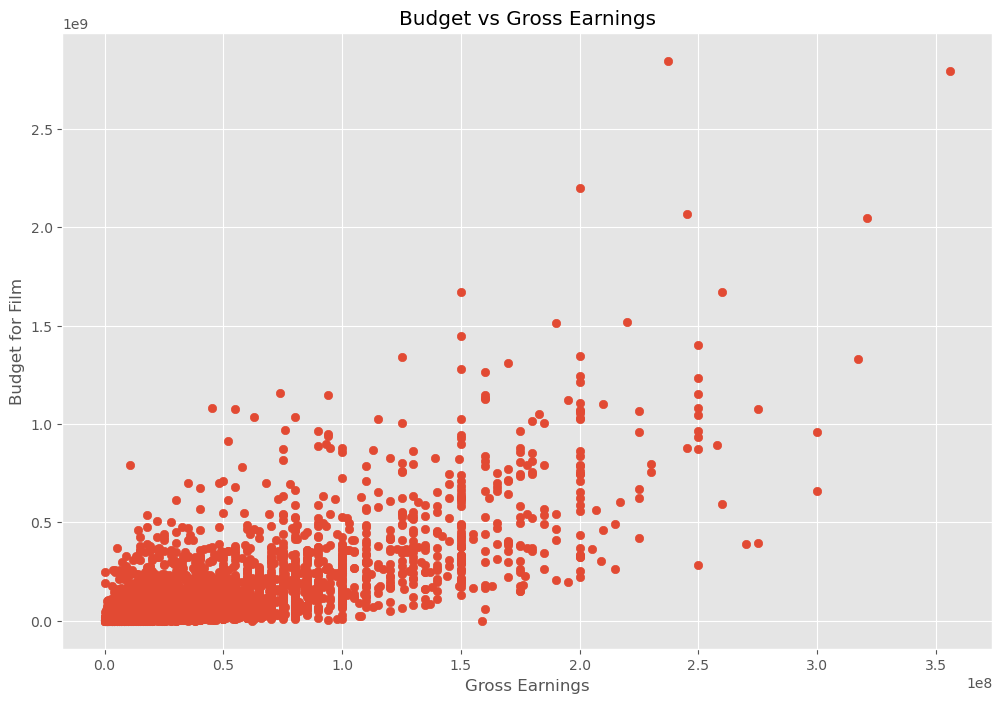

In [43]:
# Scatter plot Budget vs Gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')

plt.show()

<Axes: xlabel='budget', ylabel='gross'>

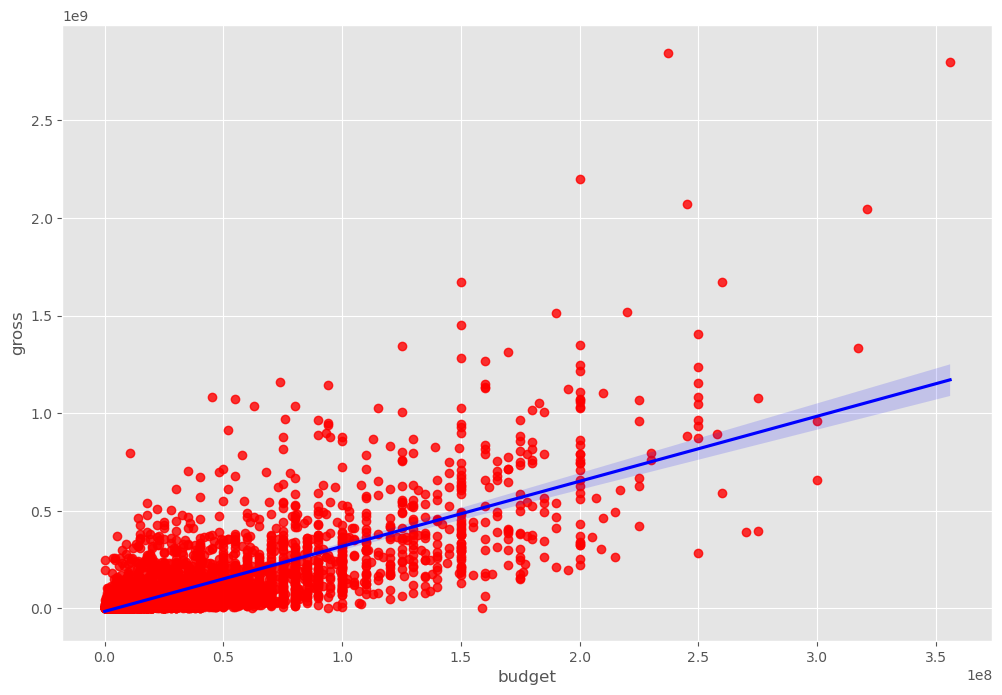

In [44]:
# Plot Budget vs Gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color":"blue"})

In [57]:
# Colleration Exploration

df.corr(numeric_only=True)    # There is high correlation between budget and gross

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


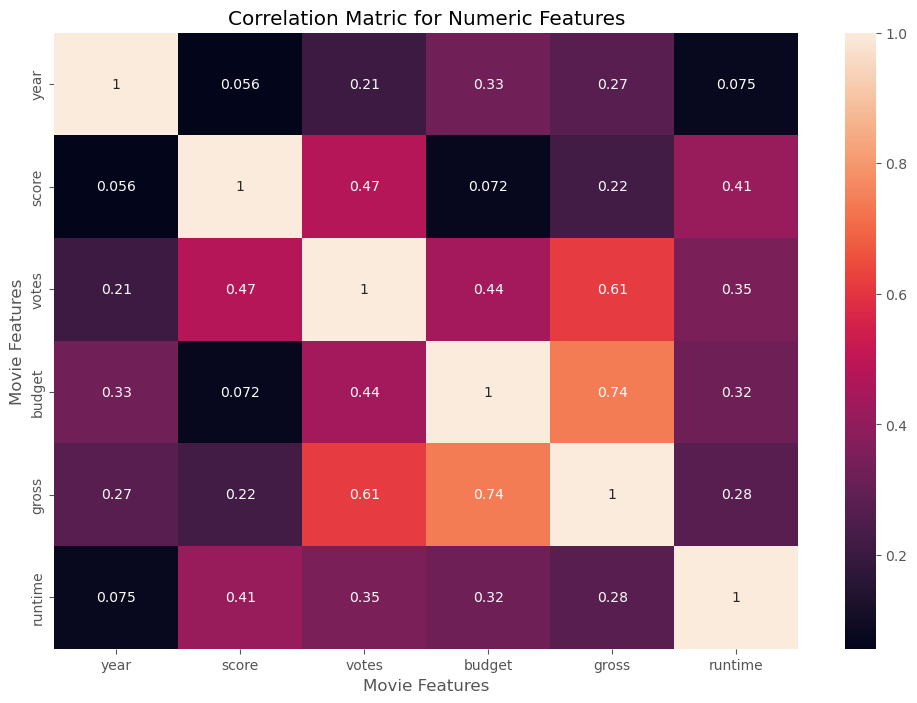

In [53]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [ ]:
# So far we can tell a strong correlation exists between budget and gross - as to be expected -
# Another strong correlation exist between votes and gross

# Now for categorical values:

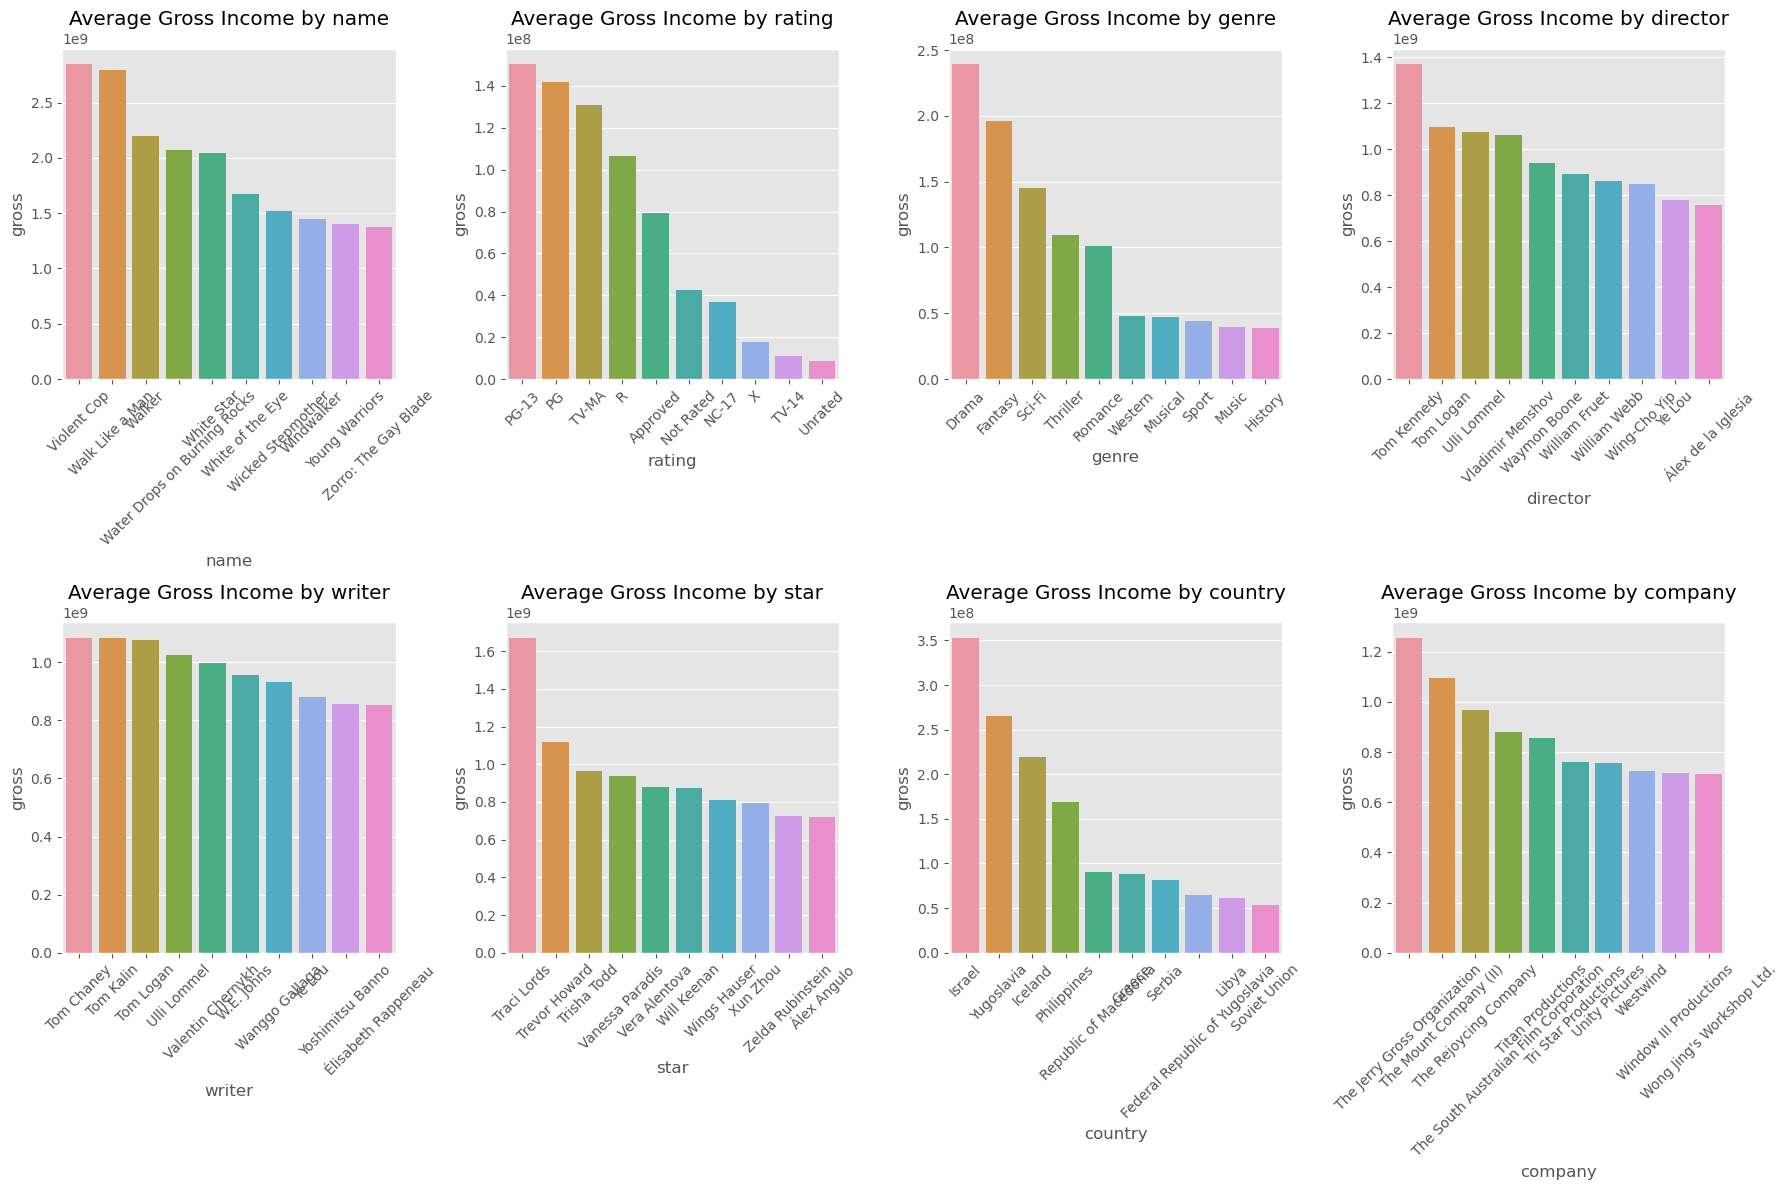

In [102]:
# Group by each categorical variable and calculate the average gross income
categorical_vars = ['name', 'rating', 'genre', 'director', 'writer', 'star', 'country', 'company']

plt.figure(figsize=(18, 12))
for i in range(len(categorical_vars)):
    var = categorical_vars[i]
    group = df.groupby(var)['gross'].mean().reset_index()
    group_sorted = group.sort_values('gross', ascending=False)
    
    plt.subplot(2, 4, i+1)
    sns.barplot(x=var, y='gross', data=group_sorted.head(10))
    sns.barplot(x=var, y='gross', data=group_sorted.tail(10))
    plt.title(f'Average Gross Income by {var}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [91]:
# The plots above show top 10 and bottom 10 grossing income for each categorical variable.

In [48]:
# ANOVA: F-statistic and P-Values
categorical_columns = ['name', 'genre', 'director', 'writer', 'star', 'country', 'company']

for col in categorical_columns:
    categories = df[col].unique()
    groups = [df[df[col] == cat]['gross'] for cat in categories]
    f_statistic, p_value = f_oneway(*groups)
    print(f"ANOVA results for {col}:")
    print(f"F-statistic: {f_statistic}")
    print(f"P-value: {p_value}")
    print()

ANOVA results for name:
F-statistic: 0.9129919132050703
P-value: 0.7412022818703385

ANOVA results for genre:
F-statistic: 52.21510214608679
P-value: 2.0722226464994312e-137

ANOVA results for director:
F-statistic: 1.8594632583501698
P-value: 1.459812965265439e-57

ANOVA results for writer:
F-statistic: 1.0657808518309808
P-value: 0.052119052107467985

ANOVA results for star:
F-statistic: 1.3731140032367524
P-value: 9.88499690887243e-16

ANOVA results for country:
F-statistic: 2.0994270161313335
P-value: 1.240145031703393e-05

ANOVA results for company:
F-statistic: 1.480681332887436
P-value: 4.327561282383927e-21



In [ ]:
# We determine that the P-value is basically 0 for the bottom 6 variables (genre to company)
# We can tell that genre to company categories contain statistically significant difference
# The huge F-stastic value of genre is to be expected as the variation between groups are much bigger than within the groups

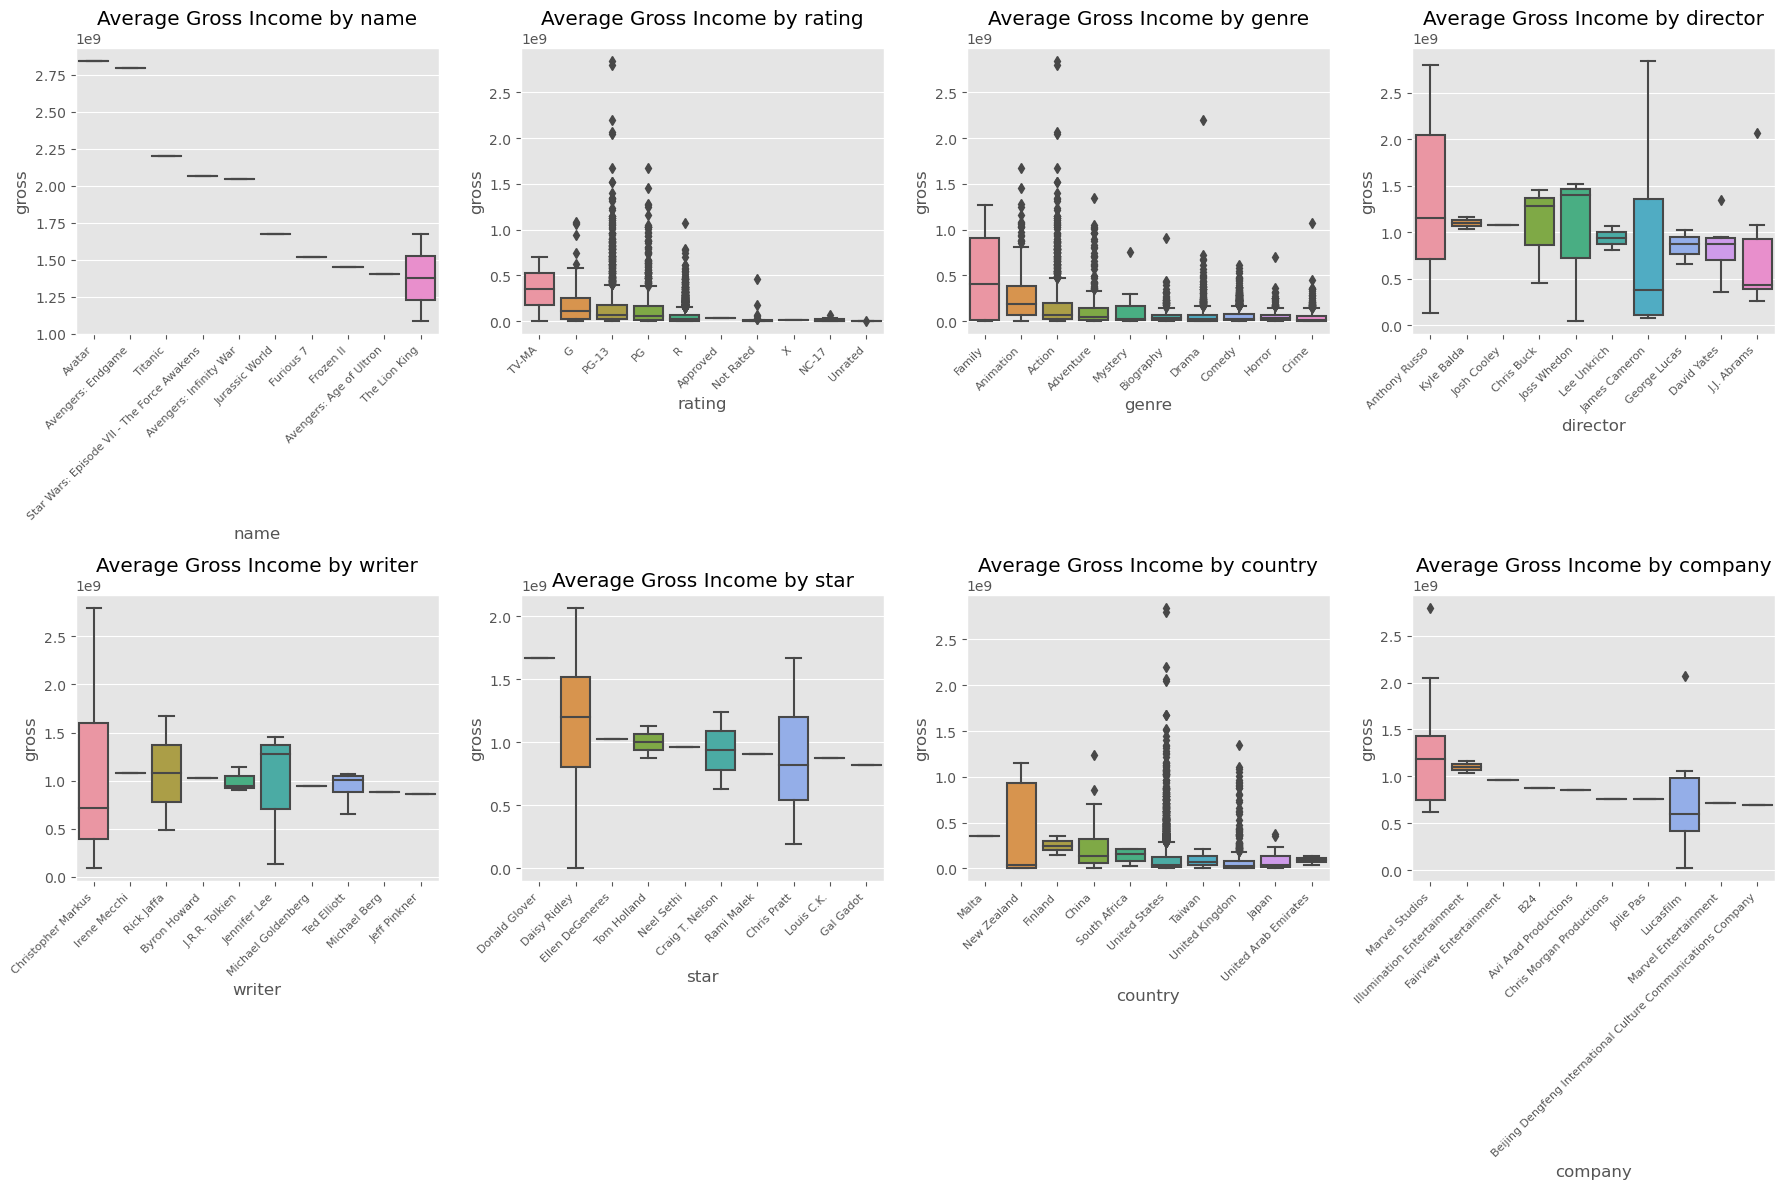

In [69]:
# Box plot for each category

categorical_vars = ['name', 'rating', 'genre', 'director', 'writer', 'star', 'country', 'company']

plt.figure(figsize=(18, 12))
for i in range(len(categorical_vars)):
    var = categorical_vars[i]
    group = df.groupby(var)['gross'].mean().reset_index()
    group_sorted = group.sort_values('gross', ascending=False)
    
    plt.subplot(2, 4, i+1)
    sns.boxplot(x=var, y='gross', data=df, order=group_sorted[var].head(10))
    plt.title(f'Average Gross Income by {var}')
    plt.xticks(rotation=45, ha='right', fontsize=8)
    
plt.tight_layout()
plt.show()

In [ ]:
# From the box plots we can determine the highest grossing categories for each nominal variable:
# Rating: PG-13, followed by PG
# Genre: Action
# Writer: Christopher Markus
# Country: United States